In [1]:
# The Reuters Dataset

from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

len(train_data)
len(test_data)
train_data[10]

2110848/2110848 [==============================] - 1s 1us/step


[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [2]:
# The Reuters Dataset

word_index= reuters.get_word_index()
reverse_word_index= dict([(value, key) for(key, value) in word_index.items()])
decoded_newswire= " ".join([reverse_word_index.get(i-3, "?") for i in
    train_data[0]])

train_labels[10]

550378/550378 [==============================] - 1s 1us/step


3

In [4]:
# Preparing The Data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results= np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train= to_one_hot(train_labels)
y_test= to_one_hot(test_labels)

from tensorflow.keras.utils import to_categorical

y_train= to_categorical(train_labels)
y_test= to_categorical(test_labels)

In [5]:
# Building The Model

from tensorflow import keras
from tensorflow.keras import layers

model= keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [6]:
# Compiling The Model

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
# Validating The Approach

x_val= x_train[:1000]
partial_x_train= x_train[1000:]
y_val= y_train[:1000]
partial_y_train= y_train[1000:]

In [8]:
# Training The Model

history= model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 2.7627 - accuracy: 0.4932 - val_loss: 1.7772 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.4464 - accuracy: 0.7081 - val_loss: 1.3354 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.7784 - val_loss: 1.1422 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.8331 - accuracy: 0.8286 - val_loss: 1.0580 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6565 - accuracy: 0.8648 - val_loss: 0.9711 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5235 - accuracy: 0.8886 - val_loss: 0.9200 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.4195 - accuracy: 0.9113 - val_loss: 0.9081 - val_accuracy: 0.8020
Epoch 8/20
16/16 

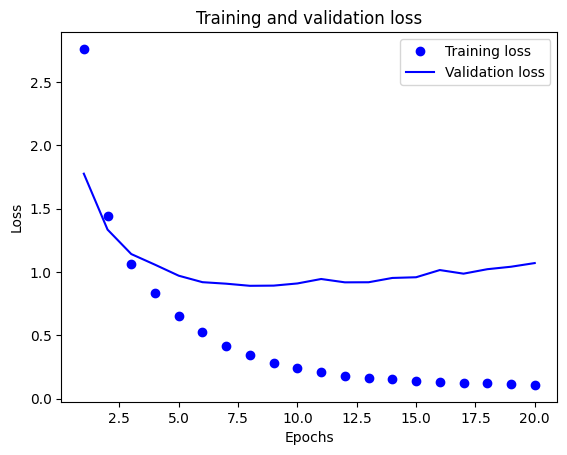

In [9]:
# Display Training and Validation Loss

import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

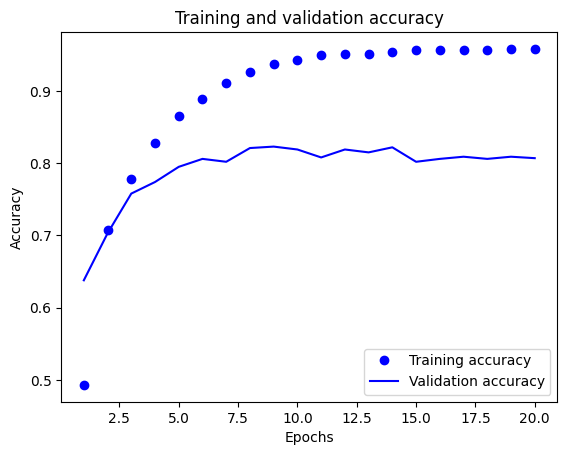

In [11]:
# Display Training and Validation Accuracy

plt.clf()
acc= history.history["accuracy"]
val_acc= history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
# Retraining a model from scratch

model= keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"] )
model.fit(x_train, y_train, epochs=9, batch_size=512 )
results= model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 7ms/step - loss: 2.6119 - accuracy: 0.4931
Epoch 2/9
18/18 [==============================] - 0s 7ms/step - loss: 1.3756 - accuracy: 0.7145
Epoch 3/9
18/18 [==============================] - 0s 7ms/step - loss: 1.0219 - accuracy: 0.7838
Epoch 4/9
18/18 [==============================] - 0s 8ms/step - loss: 0.7953 - accuracy: 0.8332
Epoch 5/9
18/18 [==============================] - 0s 7ms/step - loss: 0.6299 - accuracy: 0.8729
Epoch 6/9
18/18 [==============================] - 0s 7ms/step - loss: 0.4982 - accuracy: 0.9006
Epoch 7/9
18/18 [==============================] - 0s 7ms/step - loss: 0.4042 - accuracy: 0.9172
Epoch 8/9
18/18 [==============================] - 0s 7ms/step - loss: 0.3329 - accuracy: 0.9309
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9403 - accuracy: 0.8041


In [13]:
# Generating Predictions on New Data
predictions= model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])

71/71 [==============================] - 0s 4ms/step


3

In [14]:
# A different way to handle the labels and the loss

y_train= np.array(train_labels)
y_test= np.array(test_labels)
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
# The importance of having sufficiently large intermediate layers

model= keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(4, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 3.2575 - accuracy: 0.1914 - val_loss: 2.7087 - val_accuracy: 0.2280
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 2.1335 - accuracy: 0.4465 - val_loss: 1.7392 - val_accuracy: 0.5480
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5397 - accuracy: 0.5660 - val_loss: 1.5442 - val_accuracy: 0.5870
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.3559 - accuracy: 0.6160 - val_loss: 1.4673 - val_accuracy: 0.6140
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 1.2412 - accuracy: 0.6442 - val_loss: 1.4552 - val_accuracy: 0.6260
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 1.1515 - accuracy: 0.6701 - val_loss: 1.4410 - val_accuracy: 0.6540
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 1.0758 - accuracy: 0.7013 - val_loss: 1.4629 - val_accuracy: 0.6540
Epoch 8/20
63/63 [==